# The Sparks Foundation
## Data Science & Business Analytics Tasks - July 2021
### Task 2 - Prediction using Unsupervised ML
### Task: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
#### Submitted by: Trupti Kadam
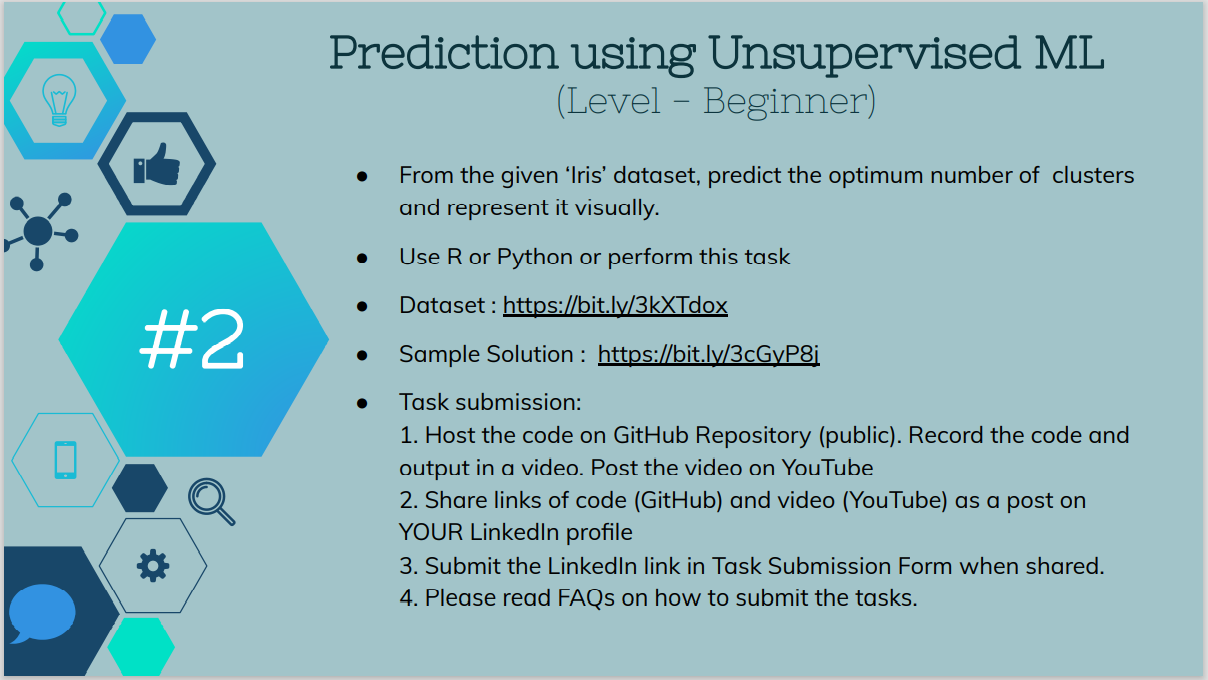

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Reading the Dataset

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

#### Getting some information from the dataset

In [4]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
df.shape

(150, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Performing some EDA

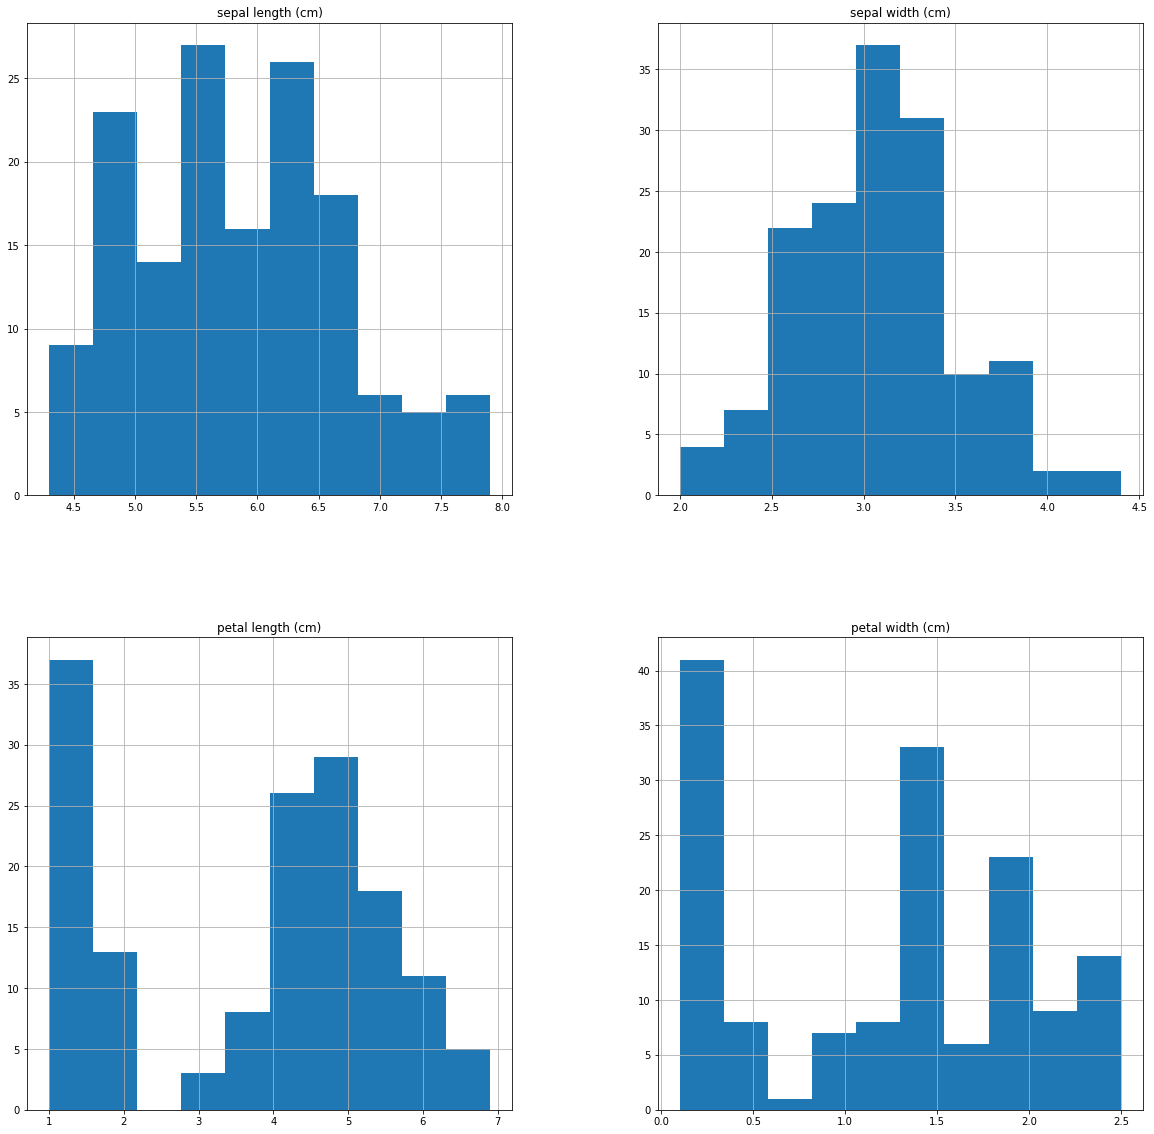

In [13]:
plot = df.hist(figsize = (20,20))

### Checking for Correlation

<AxesSubplot:>

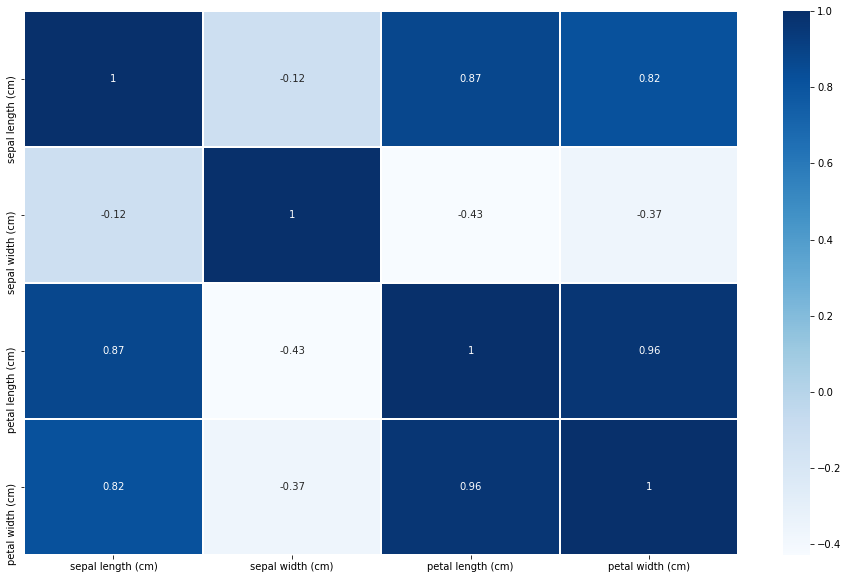

In [29]:
colour_map = plt.cm.Blues
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap = colour_map, annot = True, linewidth = 1)

Since Petal length and Petal width are highly correlated so we can drop one of them.

In [32]:
df.drop('petal length (cm)',axis = 1, inplace = True)

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal width (cm)
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


### Finding the Optimal Number of Clusters using Elbow Method

In [34]:
X = df.iloc[:, [0, 1, 2]].values

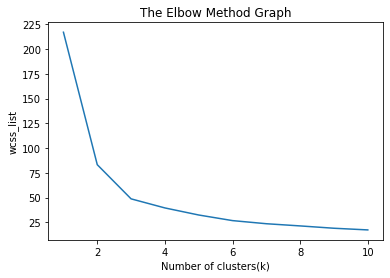

In [35]:
from sklearn.cluster import KMeans

wcss_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

The above plot shows that the Optimal Number of Clusters are 3.

### Clustering using K-Means

In [46]:
k_means = KMeans(n_clusters=3, init='k-means++',random_state=42)
y_pred = k_means.fit_predict(X)

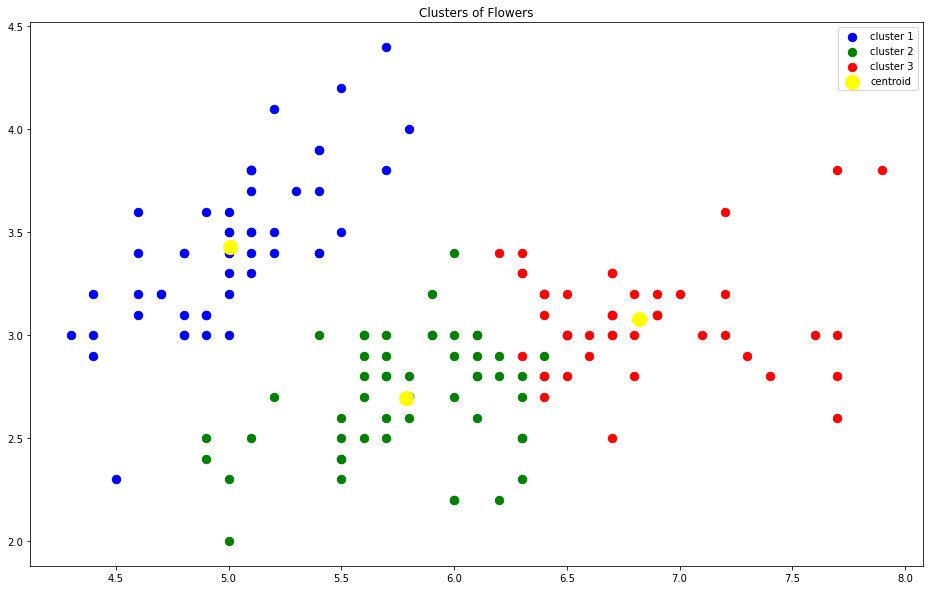

In [47]:
plt.figure(figsize=(16,10))
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=70,c='blue',label='cluster 1') #0 shows low and 1 shows High
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=70,c='green',label='cluster 2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=70,c='red',label='cluster 3')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=200,c='yellow', label='centroid')
plt.title('Clusters of Flowers')
plt.legend()
plt.show()

### Clustering using Hierarchical Algorithm

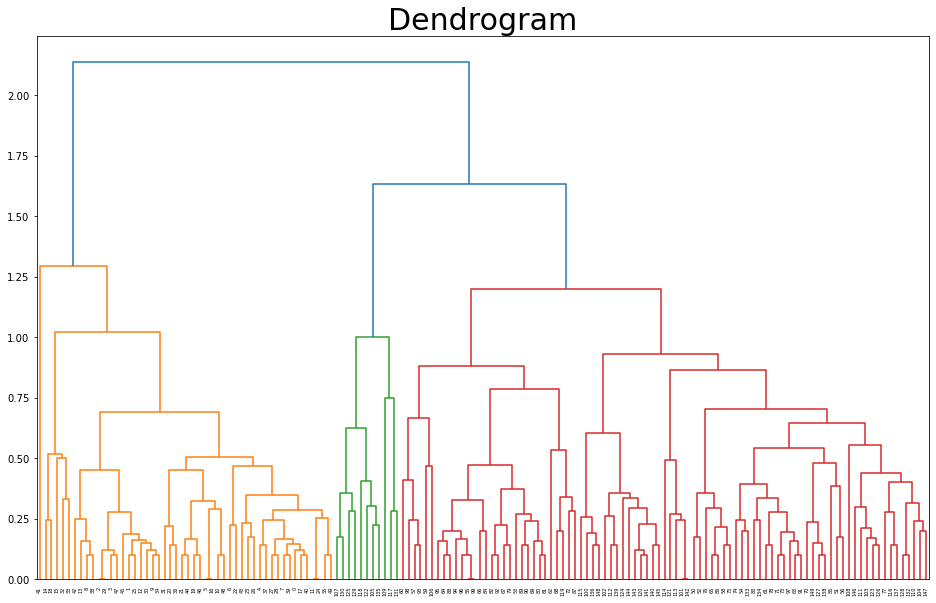

In [50]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram', fontsize = 30)
plt.show()

Even after using different clusturing algorithm like Hierarchical Clusturing where we do not need to specify the number of clusters we are still getting 3 clusters.